# Sorokat alkotó körök

![generative_4](figures/generative_4.png)

- egymást részben fedő körök sorokat alkotnak
- kitöltésre több szín eltérő gyakorisággal
- a sort lezáró utolsó kör más színű
- a körök alkotta sorok megközelítőleg egy magasságban kezdődnek
- adott sorban a körök mérete egységes, de pozíciójukban eltolás mutatkozik
- minden sorhoz tartozik egy eltérő színű kör, aminek sugara jellemzően kisebb

<b>Forrás: </b>{cite}`elayabharath`

## Szükséges könytárak telepítése és importálása

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import random

A körök helyzetét befolyásoló tényezők (eltolás, méret, átfedés) miatt célszerű volt a középpontot és sugár alapján meghatározni a rajzoláshoz szükséges paramétereket.

![generative_8](figures/generative_8.png)

In [2]:
def drawEllipse(x,y,r,color): 
        offset_x = random.randint(-3,3)
        offset_y = random.randint(-1,1)        
        x0 = int(x-r+offset_x)
        y0 = int(y-r+offset_y)
        x1 = int(x+r+offset_x)
        y1 = int(y+r+offset_y)        
        draw.ellipse([x0,y0,x1,y1], fill=color, outline=colors[6], width=1)
 

A körök által kirajzolt sorok bizonyos átfedést mutatnak. Azonban az eredeti képen látható, hogy a sorrendiség okozta átfedés nem lineáris. Ebből kifolyólag az egyes sorokhoz tartozó <code>x</code> koordináta meghatározásához <code>np.linspace()</code> függvényt használjuk, ami adott intervallumon egymástól egyenlő távolságra levő, tetszőleges mennyiségű értékeket választ. Ezek az értékek fognak alapul szolgálni a külső ciklushoz.

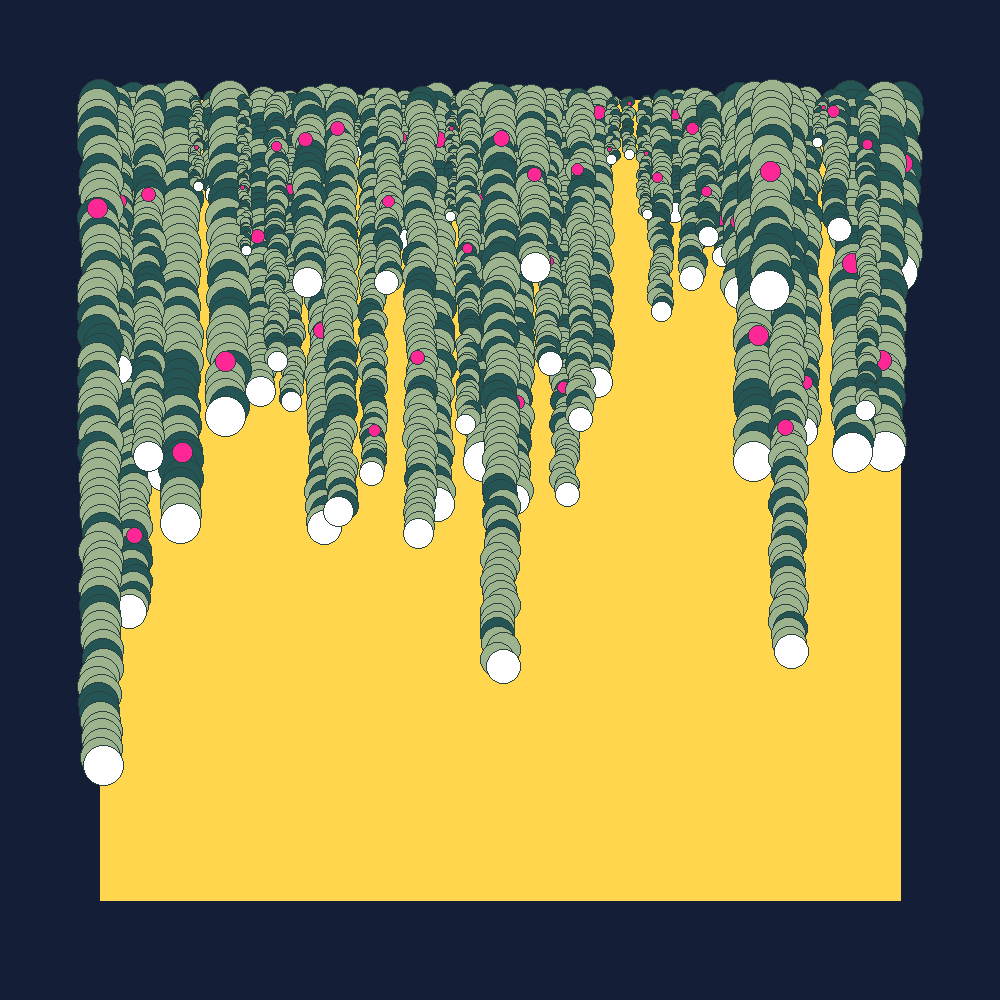

In [3]:
#paraméterek
image_width = 1000
image_height = 1000
frame = 100
radius = (5,10,12,10,15,17,15,20)
colors = [(20,30,54),(255,214,77),(255,255,255),(254,39,150),(157,179,141),(36,85,84),(40,64,62)]
overlap_y = 0.45

image = Image.new("RGB", (image_width, image_height), colors[0])
draw = ImageDraw.Draw(image)
draw.rectangle([frame,frame,image_width-frame,image_height-frame],fill=colors[1])

rows = np.linspace(frame,image_width-frame,51)
random.shuffle(rows)

for row in rows:
    length = random.randint(20,75)
    special = random.randint(0, length-5)
    r = random.choice(radius) 

    for j in range(0,length):        
        height =  frame+j*r*overlap_y
        if j == special:
            special_y = height
        if j == length-1:
            drawEllipse(row,height,r,colors[2])            
        else:
            ellipseColor = random.random()            
            if ellipseColor <= 0.70:
                drawEllipse(row,height,r,colors[4])                
            else:
                drawEllipse(row,height,r,colors[5])
    drawEllipse(row,special_y,int(r/2),colors[3]) 

display(image)